# Titanic Exploratory Data Analysis and visualization

![](https://i.postimg.cc/mg8dQz0M/1920px-Titanic-Starboard-View-1912.gif)

 **Titanic** was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on **15 April 1912** after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated **2,224 passengers** and crew aboard, **more than 1,500 died**, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of an ocean liner or cruise ship.
 
 Titanic had advanced safety features, such as watertight compartments and remotely activated watertight doors, contributing to its reputation as "unsinkable". The ocean liner carried some of the wealthiest people in the world, as well as hundreds of emigrants from Great Britain and Ireland, Scandinavia, and elsewhere throughout Europe, who were seeking a new life in the United States and Canada.
 
 Titanic was equipped with 16 lifeboat davits, each capable of lowering three lifeboats, for a total of 48 boats; she carried only 20 lifeboats, four of which were collapsible and proved hard to launch while she was sinking (Collapsible A nearly swamped and was filled with a foot of water until rescue, Collapsible B completely overturned while launching). Together, the **20 lifeboats could hold 1,178 people—about half the number of passengers on board**, and one third of the number of passengers the ship could have carried at full capacity (consistent with the maritime safety regulations of the era). When the ship sank, many of the lifeboats that had been lowered were only about half full.

In [1]:
"""
Python 3.10 Titanic Exploratory Data Analysis and visualization program will you survive on the titanic or not
File name Titanic_eda.py

Version: 0.1
Author: MLCV
Date: 2023-08-07
"""

# Importing Libraries
# visualization
from plotnine import *  # plotnine is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot.
import matplotlib.pyplot as plt  # collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns  # statistical data visualization

# data analysis
import pandas as pd  # is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language
import numpy as np  # offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more

import warnings  # Base category for warnings triggered during the process of importing a module (ignored by default)
warnings.filterwarnings('ignore')  # here we prescribe the action in case of an error.

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.


# **Overview data competition 'Titanic - Machine Learning from Disaster'**


![](https://i.postimg.cc/JnCxwJ4k/Screenshot-1.png)

* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

In [2]:
'''let's create a function, feed the training and test data sets as an input, 
and at the output we will get a combined one, without an index'''
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

'''Let's create a function at the input of which we feed the combined data set, 
and at the output it returns the separated df of the training and test set, saved without a label'''
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)



'''The Python Pandas packages helps us work with our datasets. 
We start by acquiring the training and testing datasets into Pandas DataFrames. 
We also combine these datasets to run certain operations on both datasets together.
'''
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')  # load train data
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')  # load test data
df_all = concat_df(df_train, df_test)  # we apply the function described above, the union of two dataframes.

'''supplement the data sets with the name parameter'''
df_train.name = 'Training Set'  # set parameter for dataset - dataframe name
df_test.name = 'Test Set'  # set parameter for dataset - dataframe name
df_all.name = 'All Set'  # set parameter for dataset - dataframe name 

dfs = [df_train, df_test]

# display information about datasets
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)
print(df_train.info())
print(df_train.describe())
df_train.sample(5)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
349,350,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,315088,8.6625,NaN,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C


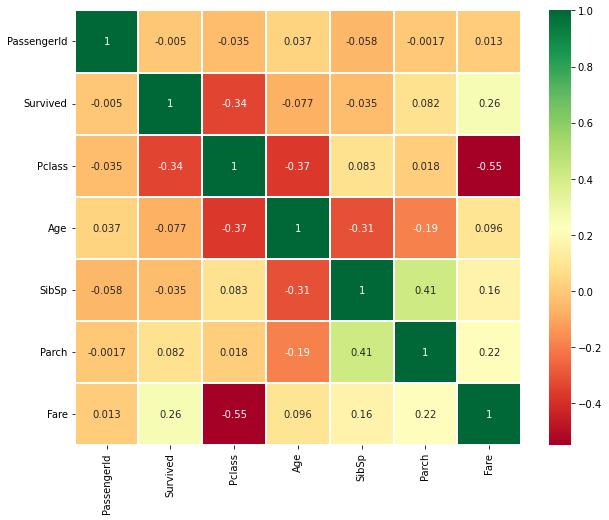

In [3]:
'''Correlation Between The Features'''
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()        

![](https://i.postimg.cc/Jzk7cc8S/Titanic-II.jpg)
Pandas also helps describe the datasets answering following questions early in our project.

Which features are available in the dataset?

**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

- Categorical: **Survived**, **Sex**, and **Embarked**. 
- Ordinal: **Pclass**.

**What is the distribution of categorical features?**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

**Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- Continous: **Age**, **Fare**. 
- Discrete: **SibSp**, **Parch**.

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

- Ticket is a mix of numeric and alphanumeric data types. **Cabin** is alphanumeric.

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

- **Name** feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.



In [4]:
# function to analyze each column of the dataframe
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




As seen from below, some columns have missing values. `display_missing` function shows the count of missing values in every column in both training and test set.
* Training set have missing values in `Age`, `Cabin` and `Embarked` columns
* Test set have missing values in `Age`, `Cabin` and `Fare` columns

It is convenient to work on concatenated training and test set while dealing with missing values, otherwise filled data may overfit to training or test set samples. The count of missing values in `Age`, `Embarked` and `Fare` are smaller compared to total sample, but roughly **80%** of the `Cabin` is missing. Missing values in `Age`, `Embarked` and `Fare` can be filled with descriptive statistical measures but that wouldn't work for `Cabin`.

# Sex

In [5]:
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

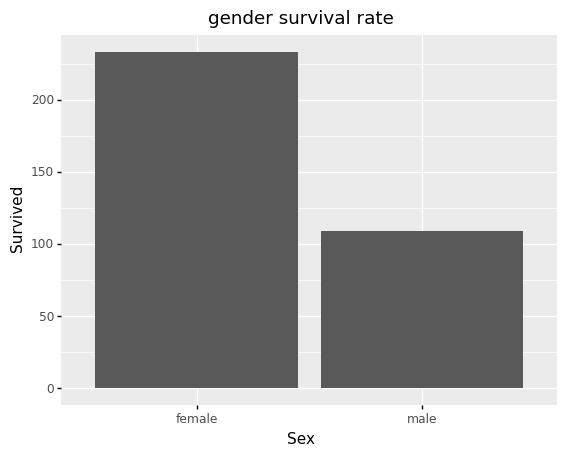

<ggplot: (8740418740469)>

In [7]:
(ggplot(df_train)
 + aes(x='Sex', y='Survived')
 + geom_col()
 + ggtitle('gender survival rate')
 + theme(text=element_text(family='NanumBarunGothic'))
)

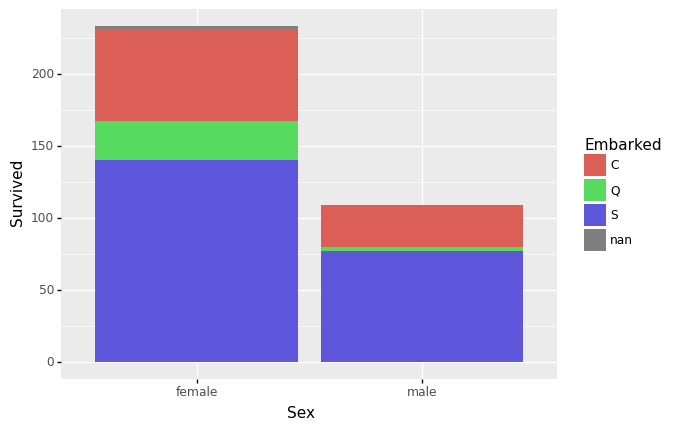

<ggplot: (8740418619221)>

In [8]:
(ggplot(df_train)
 + aes(x='Sex', y='Survived', fill='Embarked')
 + geom_col()
)

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

# Pclass

In [9]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
df_train['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
# Although it is a number, it is changed to a string because it is categorical data
df_train['Pclass'] = df_train['Pclass'].astype('str')

pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


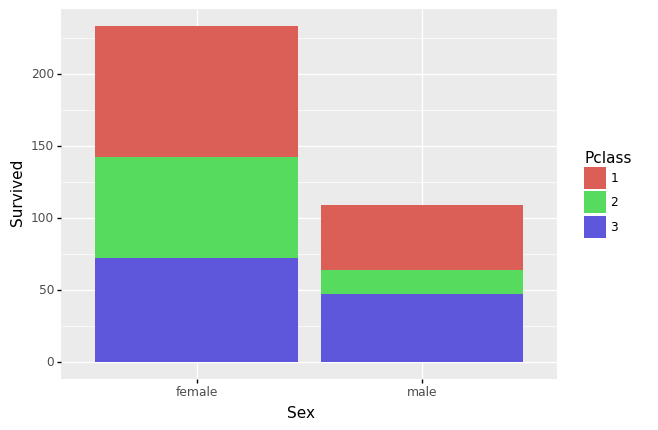

<ggplot: (8740418437637)>

In [12]:
(ggplot(df_train)
 + aes(x='Sex', y='Survived', fill='Pclass')
 + geom_col()
)

People say Money Can't Buy Everything. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

# Age

In [13]:
df_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [14]:
df_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [15]:
train_dropna_age = df_train['Age'].dropna()

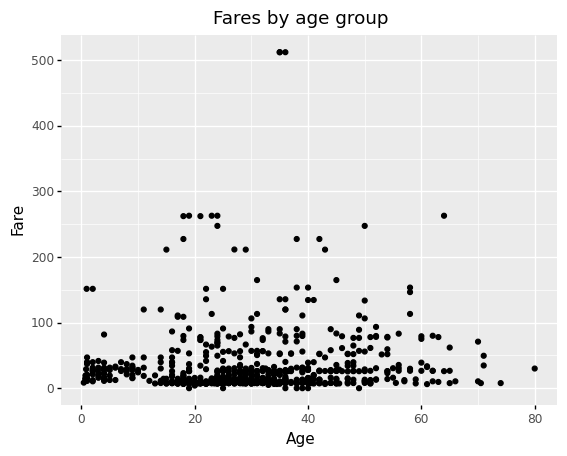

<ggplot: (8740418417505)>

In [16]:
(ggplot(df_train)
 + aes(x='Age', y='Fare')
 + geom_point()
 + ggtitle('Fares by age group')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [17]:
df_train['Survived'] = df_train['Survived'].astype('category')

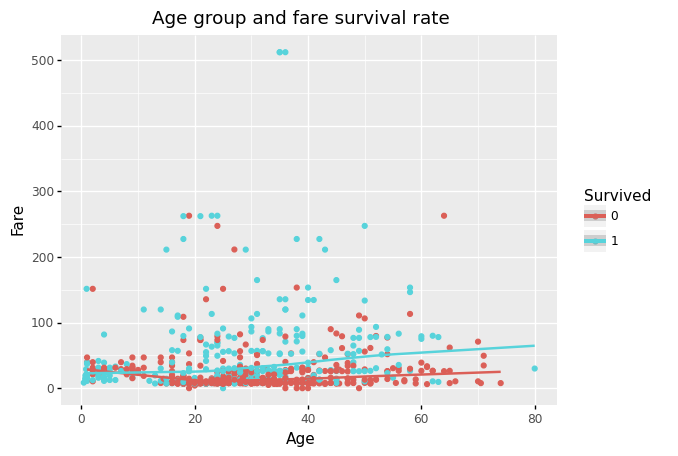

<ggplot: (8740418274029)>

In [18]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + ggtitle('Age group and fare survival rate')
 + theme(text=element_text(family='NanumBarunGothic'))
)

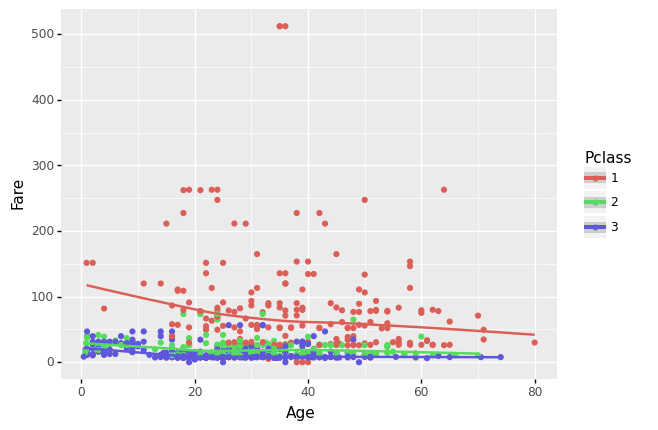

<ggplot: (8740418452625)>

In [19]:
# Is there a correlation between age and Pclass?
(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Pclass')
 + geom_point()
 + stat_smooth()
)

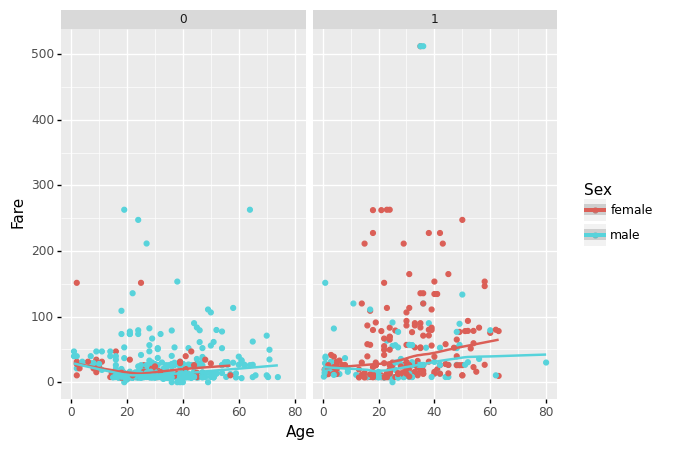

<ggplot: (8740418230253)>

In [20]:
(ggplot(df_train) 
 + aes(x='Age', y='Fare', color='Sex')
 + geom_point()
 + stat_smooth()
 + facet_wrap('~Survived')
)

In [21]:
# Although it is a number, it is changed to a category because it is categorical data
df_train['Survived'] = df_train['Survived'].astype('category')

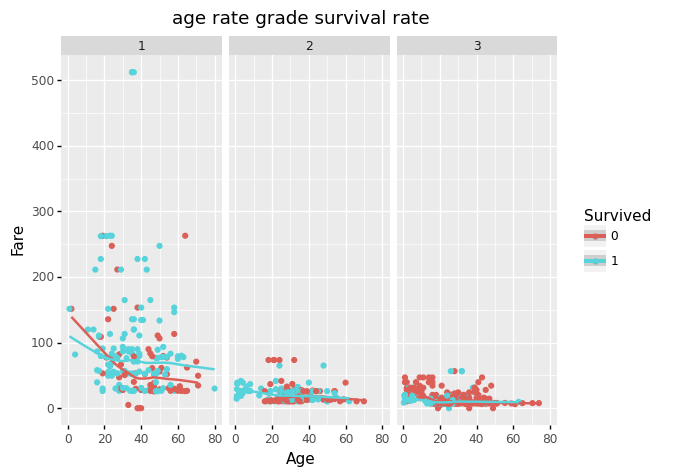

<ggplot: (8740416502845)>

In [22]:
# See the correlation between age and fare gender
(ggplot(df_train) 
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + facet_wrap('~Pclass')
 + ggtitle('age rate grade survival rate')
 + theme(text=element_text(family='NanumBarunGothic'))
)

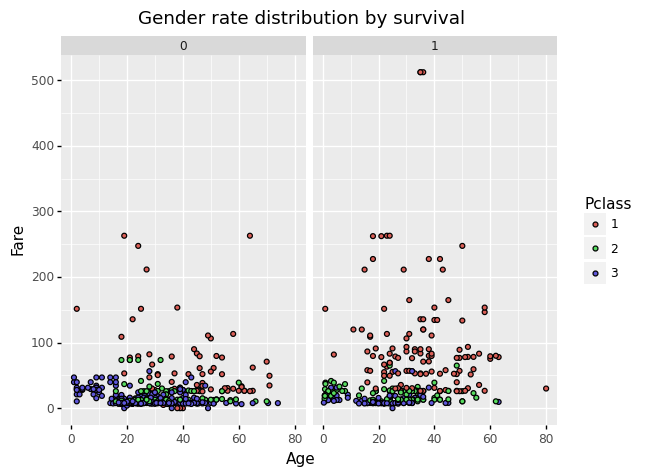

<ggplot: (8740418561473)>

In [23]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + ggtitle('Gender rate distribution by survival')
 + facet_wrap('~Survived')
 + theme(text=element_text(family='NanumBarunGothic'))
)

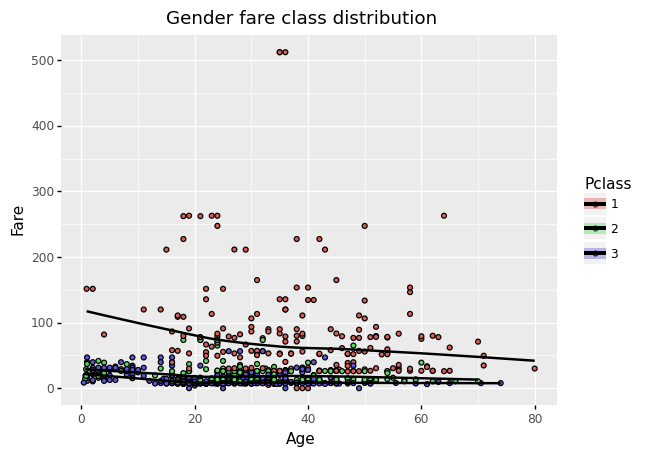

<ggplot: (8740416492697)>

In [24]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + stat_smooth()
 + ggtitle('Gender fare class distribution')
 + theme(text=element_text(family='NanumBarunGothic'))
)

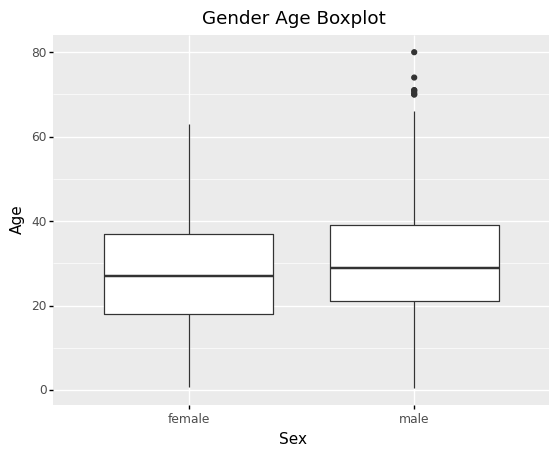

<ggplot: (8740416218081)>

In [25]:
# View correlation between age and fare gender
(ggplot(df_train) 
 + aes(x='Sex', y='Age')
 + geom_boxplot()
 + ggtitle('Gender Age Boxplot')
 + theme(text=element_text(family='NanumBarunGothic'))
)

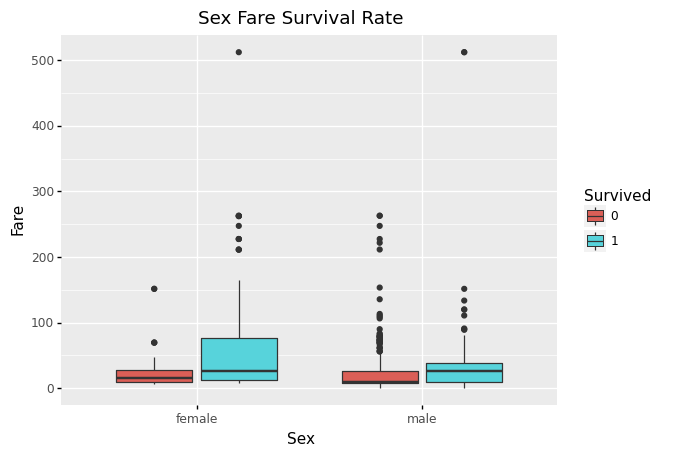

<ggplot: (8740416217893)>

In [26]:
(ggplot(df_train) 
 + aes(x='Sex', y='Fare', fill='Survived')
 + geom_boxplot()
 + ggtitle('Sex Fare Survival Rate')
 + theme(text=element_text(family='NanumBarunGothic'))
)

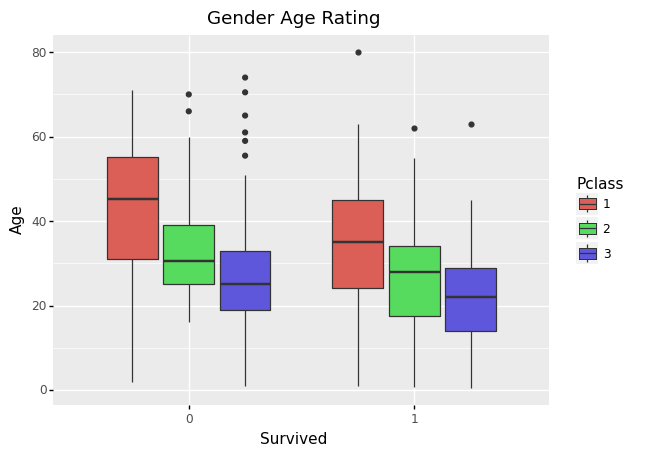

<ggplot: (8740416183373)>

In [27]:
(ggplot(df_train) 
 + aes(x='Survived', y='Age', fill='Pclass')
 + geom_boxplot()
 + ggtitle('Gender Age Rating')
 + theme(text=element_text(family='NanumBarunGothic'))
)

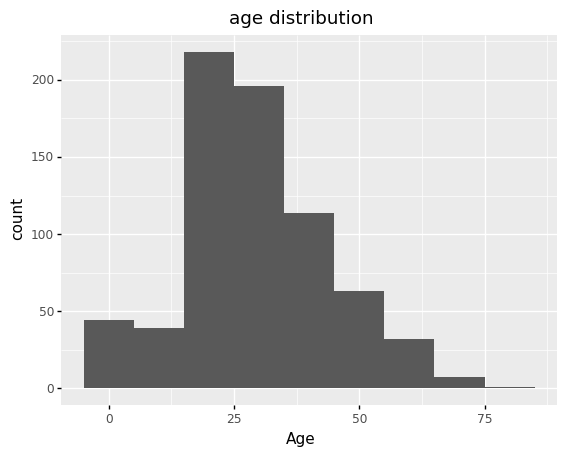

<ggplot: (8740416180469)>

In [28]:
(ggplot(df_train) 
 + aes(x='Age')
 + geom_histogram(binwidth=10)
 + ggtitle('age distribution')
 + theme(text=element_text(family='NanumBarunGothic'))
)

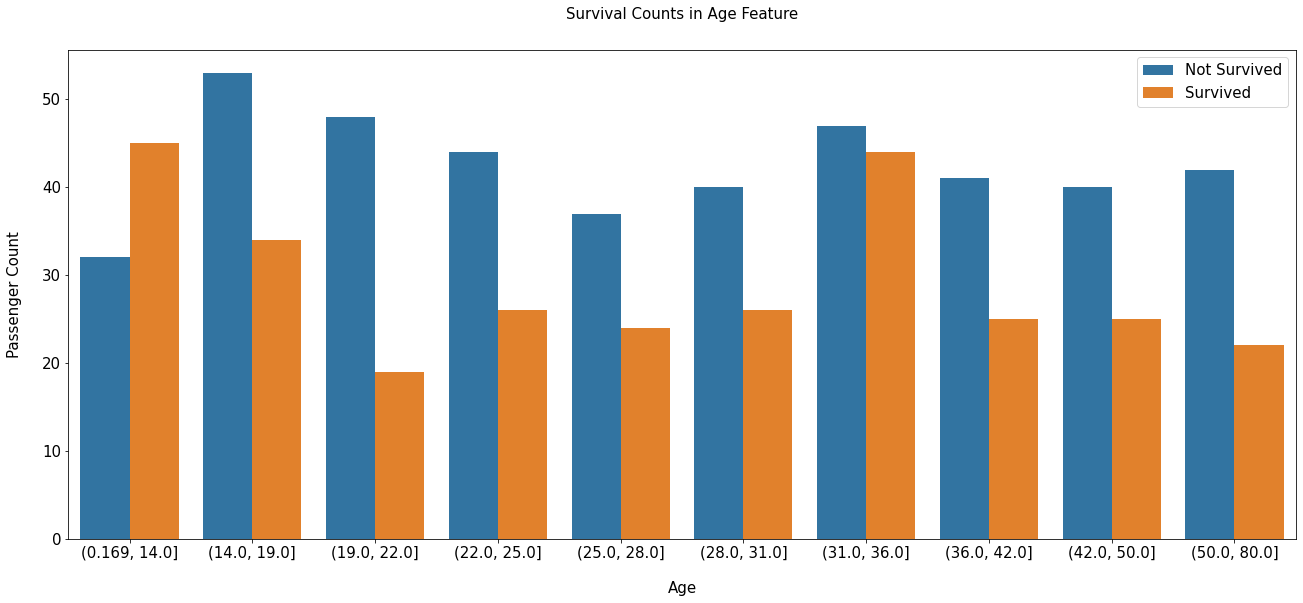

In [29]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

In [30]:
print('Oldest Passenger was of:',df_train['Age'].max(),'Years')
print('Youngest Passenger was of:',df_train['Age'].min(),'Years')
print('Average Age on the ship:',df_train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


Age feature has a normal distribution with some spikes and bumps and 10 quantile based bins are used for Age. The first bin has the highest survival rate and 4th bin has the lowest survival rate. Those were the biggest spikes in the distribution. There is also an unusual group (34.0, 40.0] with high survival rate that is captured in this process.

- The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.
- Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.
- For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

We can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [31]:
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
    
'''We are using the Regex: [A-Za-z]+).. 
So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). 
So we successfully extract the Initials from the Name.'''

pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r')  # Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [32]:

df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
df_train.groupby('Initial')['Age'].mean()  # lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [33]:
# Assigning the NaN Values with the Ceil values of the mean ages
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46
df_train.Age.isnull().any()  # So no null values left finally 

False

# Dimensions and layout


 Titanic was 882 feet 9 inches (269.06 m) long with a maximum breadth of 92 feet 6 inches (28.19 m).

Her total height, measured from the base of the keel to the top of the bridge, was 104 feet (32 m). She measured 46,329 GRT and 21,831 NRT and with a draught of 34 feet 7 inches (10.54 m), she displaced 52,310 tons. All three of the Olympic-class ships had ten decks (excluding the top of the officers' quarters), eight of which were for passenger use.

![](https://i.postimg.cc/jdNDRXX6/397783164.jpg)

# Cabin

Approximately 77% of Cabin feature is missing in the training data and 78% missing on the test data. We have two choices,

we can either get rid of the whole feature, or
we can brainstorm a little and find an appropriate way to put them in use. For example, We may say passengers with cabin record had a higher socio-economic-status then others. We may also say passengers with cabin record were more likely to be taken into consideration when loading into the boat.

All the cabin names start with an English alphabet following by multiple digits. It seems like there are some passengers that had booked multiple cabin rooms in their name. This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name.

In [34]:
print("Train Cabin missing: " + str(df_train.Cabin.isnull().sum()/len(df_train.Cabin)))
print("Test Cabin missing: " + str(df_test.Cabin.isnull().sum()/len(df_test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [35]:
# print(df_all.info())
# Assign all the null values to N
df_all.Cabin.fillna("N", inplace=True)

# group these cabins according to the letter of the cabin name
df_all.Cabin = [str(i)[0] for i in df_all.Cabin]



def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

percent_value_counts(df_all, "Cabin")

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [36]:
df_all.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [37]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

'''Now, these means can help us determine the unknown cabins, if we compare each unknown cabin rows with the given mean's above. 
Let's write a simple function so that we can give cabin names based on the means.'''

#applying cabin estimator function. 
df_all['Cabin'] = df_all.Fare.apply(lambda x: cabin_estimator(x))

percent_value_counts(df_all, "Cabin")

,Total,Percent
G,714,54.55
F,201,15.36
C,143,10.92
T,109,8.33
B,72,5.50
A,37,2.83
E,27,2.06
D,6,0.46


`Cabin` feature is little bit tricky and it needs further exploration. The large portion of the `Cabin` feature is missing and the feature itself can't be ignored completely because some the cabins might have higher survival rates. It turns out to be the first letter of the `Cabin` values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.
![alt text](https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733)

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Olympic_%26_Titanic_cutaway_diagram.png/800px-Olympic_%26_Titanic_cutaway_diagram.png" width = 800 height = 900 alig n= center/>


* On the Boat Deck there were **6** rooms labeled as **T, U, W, X, Y, Z** but only the **T** cabin is present in the dataset
* **A**, **B** and **C** decks were only for 1st class passengers
* **D** and **E** decks were for all classes
* **F** and **G** decks were for both 2nd and 3rd class passengers
* From going **A** to **G**, distance to the staircase increases which might be a factor of survival

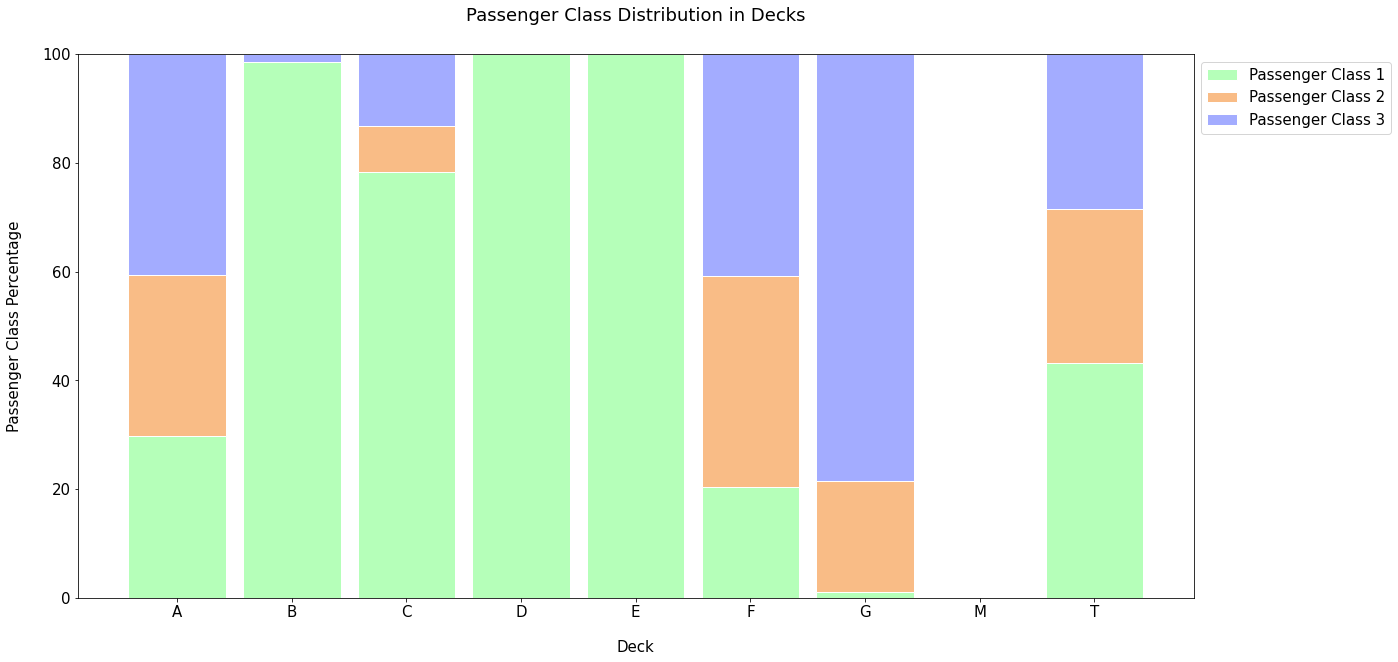

In [38]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

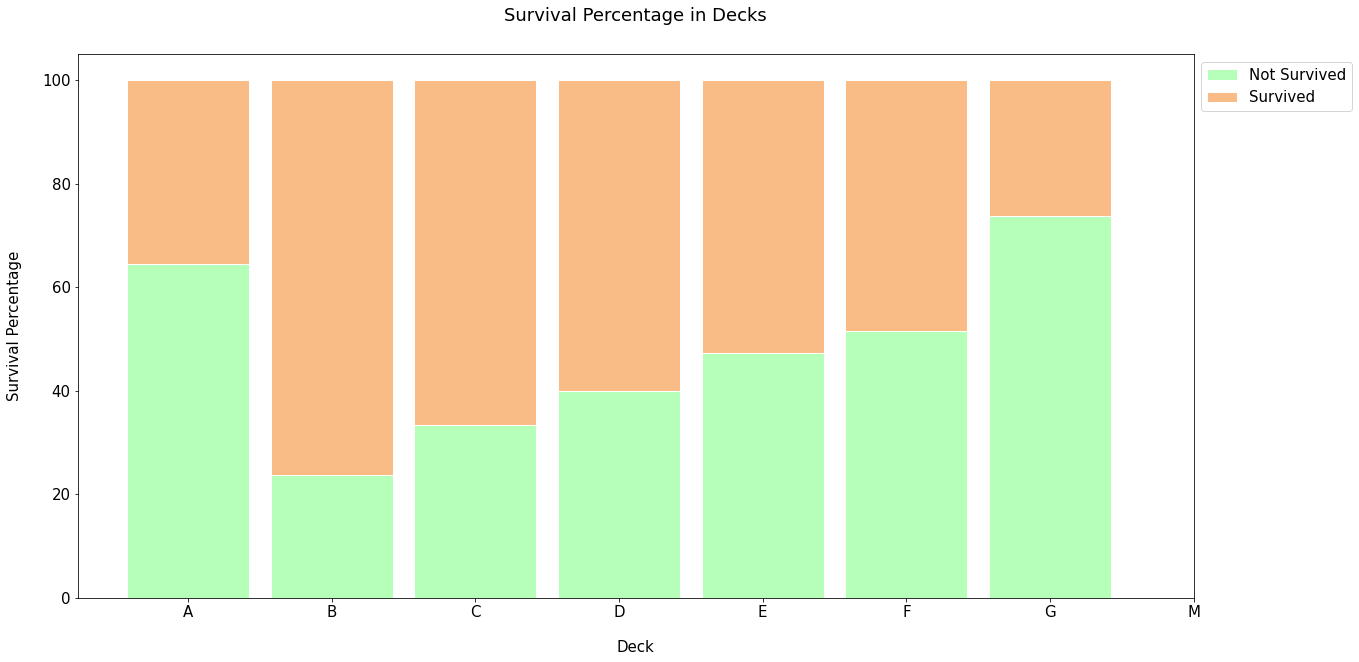

In [39]:
# Passenger in the T deck is changed to A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

Each deck has different survivability, and this information cannot be discounted. Decks B, C, D, and E have the highest survival rates. These decks are mostly occupied by 1st class passengers. M has the lowest survival rate, which is mostly occupied by 2nd and 3rd class passengers. Thus, cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers. In my opinion, M (missing cabin values) has the lowest survivability because they couldn't get data on victims' cabins. That's why I think that marking this group as M is a reasonable way to handle missing data. This is a unique group with common characteristics. The deck feature is now more powerful, so some values are grouped together based on their similarity.

# Fare¶
Fare feature is positively skewed and survival rate is extremely high on the right end. 13 quantile based bins are used for Fare feature. Even though the bins are too much, they provide decent amount of information gain. The groups at the left side of the graph has the lowest survival rate and the groups at the right side of the graph has the highest survival rate. This high survival rate was not visible in the distribution graph.

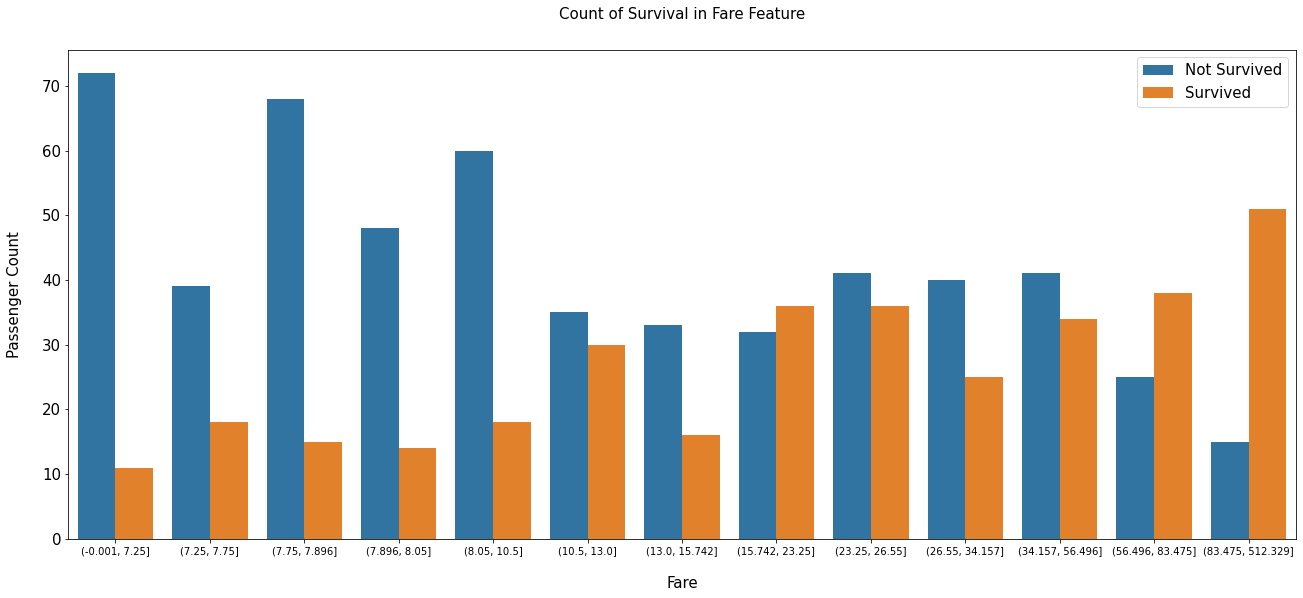

In [40]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

# Embarked


![](https://i.postimg.cc/xTb0hNrS/Titanic-voyage-map.png)

Embarked feature takes S, Q, C values based on port of embarkation. It looks like there are only two null values( ~ 0.22 %) in the Embarked feature, we can replace these with the mode value "S". However, let's dig a little deeper. Let's see what are those two null values

In [41]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
df_train[df_train.Embarked.isnull()]
'''
We may be able to solve these two missing values by looking at other independent variables of the two raws. 
Both passengers paid a fare of $80, are of Pclass 1 and female Sex.
the average fare closest to $80 are in the C Embarked values where pclass is 1. So, let's fill in the missing values as "C"
'''

'\nWe may be able to solve these two missing values by looking at other independent variables of the two raws. \nBoth passengers paid a fare of $80, are of Pclass 1 and female Sex.\nthe average fare closest to $80 are in the C Embarked values where pclass is 1. So, let\'s fill in the missing values as "C"\n'

In [43]:
df_train['Embarked'].fillna('C', inplace = True)
df_train['Embarked'].value_counts()

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked
0,C
1,Q
2,S


In [44]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True).style.background_gradient(cmap='summer_r')

# Atlantic crossing

The route of Titanic's maiden voyage, with the coordinates of her sinking
Titanic was planned to arrive at New York Pier 59 on the morning of 17 April. After leaving Queenstown, Titanic followed the Irish coast as far as Fastnet Rock, a distance of some 55 nautical miles (63 mi; 102 km). From there she travelled 1,620 nautical miles (1,860 mi; 3,000 km) along a Great Circle route across the North Atlantic to reach a spot in the ocean known as "the corner" south-east of Newfoundland, where westbound steamers carried out a change of course. Titanic sailed only a few hours past the corner on a rhumb line leg of 1,023 nautical miles (1,177 mi; 1,895 km) to Nantucket Shoals Light when she made her fatal contact with an iceberg. The final leg of the journey would have been 193 nautical miles (222 mi; 357 km) to Ambrose Light and finally to New York Harbor.


Titanic received a series of warnings from other ships of drifting ice in the area of the Grand Banks of Newfoundland, but Captain Edward Smith ignored them. One of the ships to warn Titanic was the Atlantic Line's Mesaba. Nevertheless, the ship continued to steam at full speed, which was standard practice at the time. Although the ship was not trying to set a speed record, timekeeping was a priority, and under prevailing maritime practices, ships were often operated at close to full speed, with ice warnings seen as advisories and reliance placed upon lookouts and the watch on the bridge. It was generally believed that ice posed little danger to large vessels. Close calls with ice were not uncommon, and even head-on collisions had not been disastrous. In 1907, SS Kronprinz Wilhelm, a German liner, had rammed an iceberg but still had been able to complete her voyage, and Captain Smith himself had declared in 1907 that he "could not imagine any condition which would cause a ship to founder. Modern shipbuilding has gone beyond that."

# Sinking

![](https://i.postimg.cc/9ftmF61X/Titanic-sinking-gif.gif)


At 11:40 pm (ship's time) on 14 April, lookout Frederick Fleet spotted an iceberg immediately ahead of Titanic and alerted the bridge. First Officer William Murdoch ordered the ship to be steered around the obstacle and the engines to be reversed, but it was too late; the starboard side of Titanic struck the iceberg, creating a series of holes below the waterline. The hull was not punctured by the iceberg, but rather dented such that the hull's seams buckled and separated, allowing water to rush in. Five of the ship's watertight compartments were breached. It soon became clear that the ship was doomed, as she could not survive more than four compartments being flooded. Titanic began sinking bow-first, with water spilling from compartment to compartment as her angle in the water became steeper.


706 people survived the disaster and were conveyed by Carpathia to New York, Titanic's original destination, and 1,517 people died. Carpathia's captain described the place as an ice field that had included 20 large bergs measuring up to 200 feet (61 m) high and numerous smaller bergs, as well as ice floes and debris from Titanic; passengers described being in the middle of a vast white plain of ice, studded with icebergs. This area is now known as Iceberg Alley.


Fewer than a third of those aboard Titanic survived the disaster. Some survivors died shortly afterwards; injuries and the effects of exposure caused the deaths of several of those brought aboard Carpathia. The figures show stark differences in the survival rates of the different classes aboard Titanic. Although only 3% of first-class women were lost, 54% of those in third-class died. Similarly, five of six first-class and all second-class children survived, but 52 of the 79 in third-class perished. The differences by gender were even bigger: nearly all female crew members, first- and second-class passengers were saved. Men from the First Class died at a higher rate than women from the Third Class. In total, 50% of the children survived, 20% of the men and 75% of the women.

![](https://i.postimg.cc/0yc49xJ0/Screenshot-3.png)


Only 333 bodies of Titanic victims were recovered, which amounted to one in five of the over 1,500 victims. Some bodies sank with the ship while currents quickly dispersed bodies and wreckage across hundreds of miles, making them difficult to recover. By June, one of the last search ships reported that life jackets supporting bodies were coming apart and releasing bodies to sink.

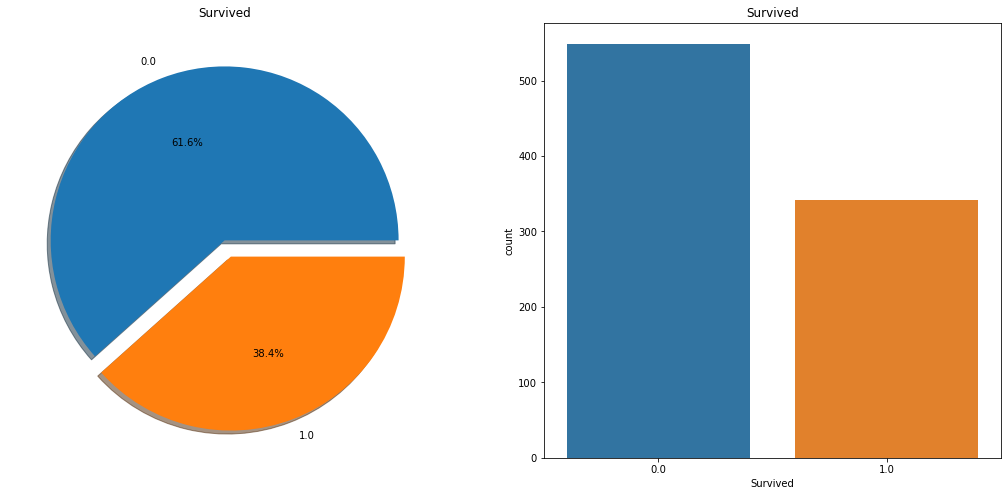

In [45]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_all['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_all,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

![](https://i.postimg.cc/KvyZDyPL/1-1300734.webp)

In [46]:
submission = pd.read_csv('/kaggle/input/titanic-competition-how-top-lb-got-their-score/submission.csv')
submission.to_csv('submission.csv', index=False)

### If you liked this core, you can also check out my other works.


I am looking for friends to develop as a machine learning specialist. 
Open to dialogue and criticism. 
### Thank you for your time!
In progress... Will be added

[link source](https://en.wikipedia.org/wiki/Titanic)